#### Modélisation avec sklearn pre-processing

In [167]:
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, validation_curve
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing, pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, PolynomialFeatures, PowerTransformer, Binarizer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score




#sklearn.preprocessing     # encodage et normalisation
#sklearn.feature_selection  # selection des variables utiles
#sklearn.feature_extraction  # extractuon de caractéristiques (generation de nouvelles variables)

In [168]:
# Étape 1 : Chargement des données
file_path = "data/4072eb5e-e963-4a17-a794-3ea028d0a9c4.csv"
data = pd.read_csv(file_path)
categorical_features = ["sex", "smoker", "region"]
numeric_features = ["age", "bmi", "children", "charges"]
X = data[numeric_features]
Xnp = data[numeric_features].to_numpy()
X.head()
data.head()
data2 = data


# Manual pipeline

In [169]:
data["male"] = data["sex"].apply(lambda x: 1 if x == "male" else 0)
data["female"] = data["sex"].apply(lambda x: 1 if x == "female" else 0)
data["southwest"] = data["region"].apply(lambda x: 1 if x == "southwest" else 0)
data["northwest"] = data["region"].apply(lambda x: 1 if x == "northwest" else 0)
data["northeast"] = data["region"].apply(lambda x: 1 if x == "northeast" else 0)
data["southeast"] = data["region"].apply(lambda x: 1 if x == "southeast" else 0)
data["smoker"] = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
data = data.drop(columns=['sex', 'region','female'])


# Catégorisation de la variable 'age'
data['age_category'] = pd.cut(
    data['age'],
    bins=[0, 25, 50, 60, float('inf')],  
    labels=['jeunes', 'adultes', 'pre-séniors', 'séniors'],  # Noms des catégories
    right=False  # Inclure la borne inférieure dans chaque intervalle
)

# Catégorisation de la variable 'age'
data['bmi_category'] = pd.cut(
    data['age'],
    bins=[0, 15, 30, 40, float('inf')],
    labels=['maigre', 'normal', 'surpoids', 'obèse'],  # Noms des catégories
    right=False  # Inclure la borne inférieure dans chaque intervalle
)

data.head()

,age,bmi,children,smoker,charges,male,southwest,northwest,northeast,southeast,age_category,bmi_category
0,19,27.900,0,1,16884.92400,0,1,0,0,0,jeunes,normal
1,18,33.770,1,0,1725.55230,1,0,0,0,1,jeunes,normal
2,28,33.000,3,0,4449.46200,1,0,0,0,1,adultes,normal
3,33,22.705,0,0,21984.47061,1,0,1,0,0,adultes,surpoids
4,32,28.880,0,0,3866.85520,1,0,1,0,0,adultes,surpoids


# SKLEARN Pipeline

In [170]:
data2['BMI_category'] = pd.cut(
    data2['age'],
    bins=[0, 15, 30, 40, float('inf')],
    labels=['maigre', 'normal', 'surpoids', 'obèse'],  # Noms des catégories
    right=False  # Inclure la borne inférieure dans chaque intervalle
)

data2['age_category'] = pd.cut(
    data2['age'],
    bins=[0, 30, 50, float('inf')],
    labels=['Djeuns', 'Adultes', 'Séniors',],  # Noms des catégories
    right=False  # Inclure la borne inférieure dans chaque intervalle
)

data2.drop_duplicates()
data2.head()

,age,sex,bmi,children,smoker,region,charges,male,female,southwest,northwest,northeast,southeast,BMI_category,age_category
0,19,female,27.900,0,1,southwest,16884.92400,0,1,1,0,0,0,normal,Djeuns
1,18,male,33.770,1,0,southeast,1725.55230,1,0,0,0,0,1,normal,Djeuns
2,28,male,33.000,3,0,southeast,4449.46200,1,0,0,0,0,1,normal,Djeuns
3,33,male,22.705,0,0,northwest,21984.47061,1,0,0,1,0,0,surpoids,Adultes
4,32,male,28.880,0,0,northwest,3866.85520,1,0,0,1,0,0,surpoids,Adultes


In [171]:
y = data2['charges']
X = data2.drop('charges',axis=1)

In [172]:
categorical_features = ["sex", "smoker", "region","BMI_category", "age_category"]
numeric_features = ["age", "bmi", "children", "charges"]

In [173]:
preprocessor = make_pipeline(make_column_transformer((StandardScaler(), ["children", "age", "bmi"]),
    (OrdinalEncoder(), ["smoker", "sex", "BMI_category", "age_category"]), (OneHotEncoder(), ["region"])), PolynomialFeatures(degree = 2 , include_bias=False))    

model = make_pipeline(preprocessor, Ridge(3.0303, random_state=42))

In [174]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [175]:
# Diviser en ensemble d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['children',
                                                                    'age',
                                                                    'bmi']),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(),
                                                                   ['smoker',
                                                                    'sex',
                                                                    'BMI_category',
                                                                    'age_category']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   ['region'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False))])),
                ('ridge', Ridge(alpha=3.0303, random_state=42))])

In [176]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


In [177]:
# Calculer les performances
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 20861443.35
Root Mean Squared Error (RMSE): 4567.43
Mean Absolute Error (MAE): 2753.03
R-squared (R²): 0.87


In [178]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

    # Affichage des résultats
    print(f"{name}:\n  Mean Squared Error: {mse:.3f}\n  R² Score: {r2:.3f}\n")

ValueError: could not convert string to float: 'female'

In [152]:
# k = np.arange(1,50)
# train_score, val_score = validation_curve(model, X_train, y_train, k, cv=5)
k = np.arange(1,10)
# Calculer la courbe de validation
train_scores, val_scores = validation_curve(
    model,
    X_train,
    y_train,
    param_name="ridge__alpha",  # Le paramètre à tester
    param_range= k,
    cv=5
)

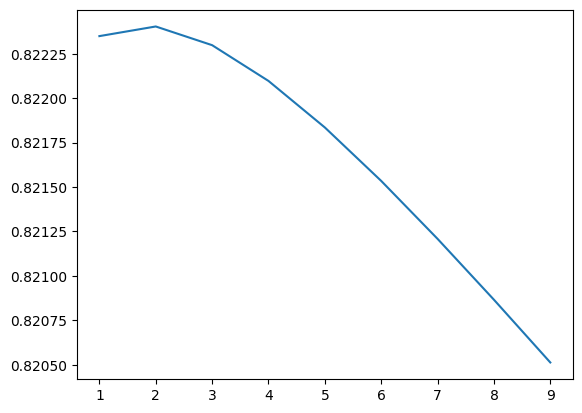

In [ ]:
plt.plot(k,val_scores.mean(axis=1))

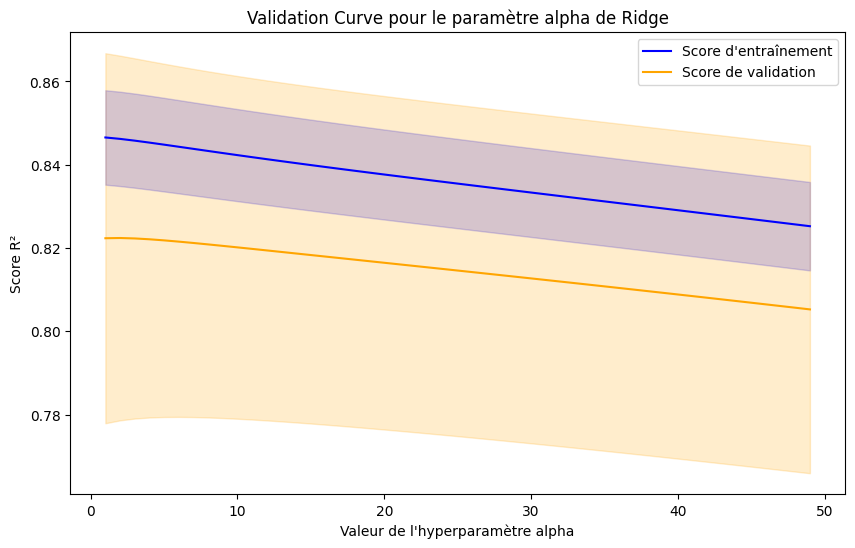

In [ ]:
# Calculer les moyennes et les écarts types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Score d'entraînement", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(param_range, val_mean, label="Score de validation", color="orange")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2)

plt.xlabel("Valeur de l'hyperparamètre alpha")
plt.ylabel("Score R²")
plt.title("Validation Curve pour le paramètre alpha de Ridge")
plt.legend()
plt.show()

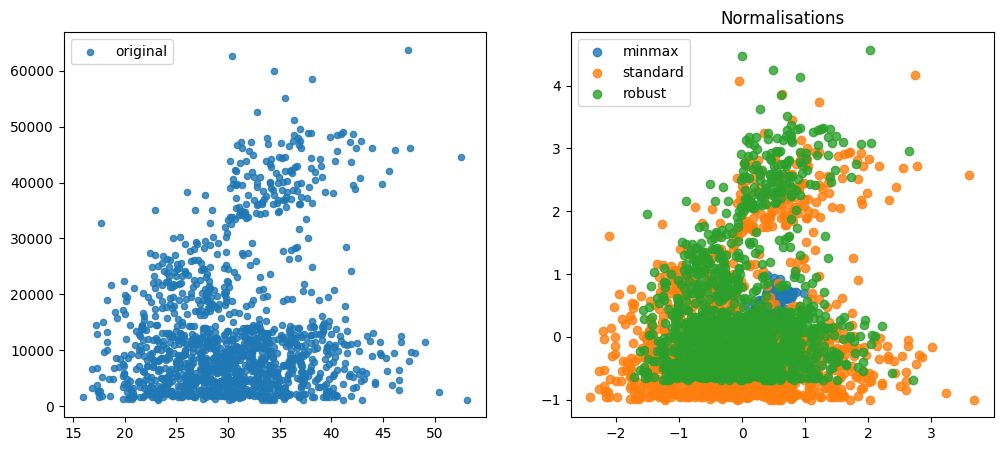

In [ ]:
X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(Xnp[:, 1], Xnp[:, 3], alpha=0.8, s=20, label ='original')

plt.legend()
plt.subplot(122)
plt.scatter(X_minmax[:, 1], X_minmax[:, 3], alpha=0.8, label = 'minmax')
plt.scatter(X_stdscl[:, 1], X_stdscl[:, 3], alpha=0.8, label = 'standard')
plt.scatter(X_robust[:, 1], X_robust[:, 3], alpha=0.8, label = 'robust')
plt.legend()
plt.title("Normalisations")
plt.show()

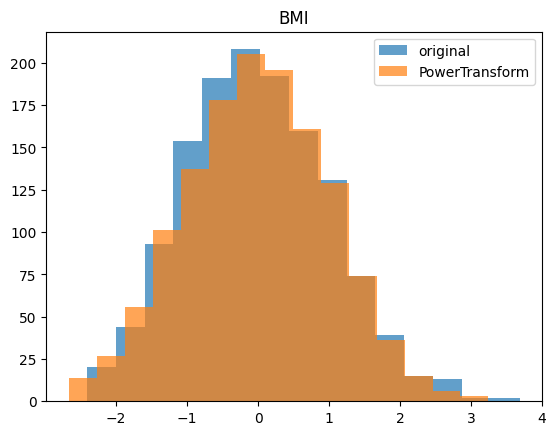

In [79]:
X2 = PowerTransformer().fit_transform(X_stdscl)

plt.hist(X_stdscl[:,1], bins = 15, alpha = 0.7, label ='original')
plt.hist(X2[:,1], bins = 15, alpha = 0.7, label ='PowerTransform')
plt.legend()
plt.title('BMI')
plt.show()

In [80]:
# Discrétisation de variables
#age

#bmi
np.hstack((Xnp[:,0], Binarizer(threshold=50).fit_transform(Xnp[:,0])))

ValueError: Expected 2D array, got 1D array instead:
array=[19. 18. 28. ... 18. 21. 61.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Définir les colonnes catégorielles et numériques
categorical_features = ["sex", "smoker", "region"]
numeric_features = ["age", "bmi", "children", "charges"]

# Transformer pour les colonnes catégorielles et numériques
categorical_transformer = OneHotEncoder(drop="first")  # Encodage One-Hot
numeric_transformer = StandardScaler()  # Standardisation

# Pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Construire le pipeline final
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Appliquer le pipeline sur les données
processed_data = pipeline.fit_transform(data)

# Convertir en DataFrame avec les noms des colonnes
columns_num = numeric_features
columns_cat = pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_columns = list(columns_num) + list(columns_cat)
processed_data_df = pd.DataFrame(processed_data, columns=all_columns)

# Afficher les données transformées
print(processed_data_df)

NameError: name 'Pipeline' is not defined

In [ ]:
# Pipeline de prétraitement
categorical_transformer = OneHotEncoder(drop="first")  # Encodage one-hot (avec drop pour éviter les colonnes redondantes)
numeric_transformer = StandardScaler()  # Normalisation des données numériques

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Application du pipeline
pipeline = pipeline(steps=[("preprocessor", preprocessor)])

# Prétraitement des données
processed_data = pipeline.fit_transform(data)

# Conversion en DataFrame pour un meilleur affichage
columns_num = numeric_features
columns_cat = pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)

processed_df = pd.DataFrame(processed_data, columns=list(columns_num) + list(columns_cat))
print(processed_df)

TypeError: 'module' object is not callable

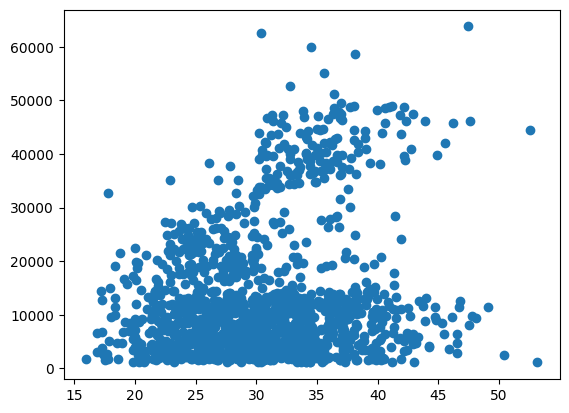

In [27]:
plt.scatter(data['bmi'], data['charges'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
